In [2]:
import csv
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15, 15]
from tqdm import tqdm_notebook
import random
import numpy as np

In [3]:
def read_points(dataset_name, y_col_number):
    x = []
    y = []
    with open (dataset_name, 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if csvReader.line_num != 1:
                float_row = []
                for i in range(0, len(row)):
                    if i != y_col_number:
                        float_row.append(float(row[i]))
                x.append(float_row)
                y.append(float(row[y_col_number]))
    return x, y

In [4]:
def split(x, y):
    test_indexes = random.sample(range(len(x)), len(x) // 5)
    train_indexes = set([i for i in range(len(x))]) - set(test_indexes)
    return [x[i] for i in train_indexes], [y[i] for i in train_indexes], [x[i] for i in test_indexes], [y[i] for i in test_indexes]

In [5]:
def get_w(x, y, alpha):
    if (np.linalg.det(np.dot(x.transpose(), x))):
        return np.dot(np.dot(np.linalg.inv(np.dot(x.transpose(), x) + alpha * np.identity(len(x[0]))), x.transpose()), y)
    return 0

In [6]:
def draw_point(x, y, color, size=10):
    plt.scatter(x, y, size, color)

In [7]:
def r_squared(x, y, h):
    predicted_y = h(x)
    u = 0
    v = 0
    sum_y = np.sum(y)
    for i in range(len(x)):
        u += (predicted_y[i] - y[i]) ** 2
        v += (1.0 / len(x) * sum_y - y[i]) ** 2
    return 1 - 1.0 * u / v

In [8]:
def add_degree(x, degree):
    new_x = []
    for elem in x:
        new_x.append(elem[:])
    if len(new_x[0]) == 1:
        for j in range(len(new_x)):
            for i in range(2, degree + 1):
                new_x[j].append(new_x[j][0] ** i)
    else:
        if degree == 2:
            for j in range(len(new_x)):
                ln = len(new_x[j])
                for i in range(ln):
                    for k in range(i, ln):
                        new_x[j].append(new_x[j][i] * new_x[j][k])  
    for i in range(len(new_x)):
        new_x[i] = [1] + new_x[i]   
    return new_x

In [9]:
def ridge_regression(x, y, degree, alpha):
    new_x = add_degree(x, degree)
    w = get_w(np.array(new_x), np.array(y), alpha)
    def h(x):
        new_x = add_degree(x, degree)
        ans = []
        for j in range(len(new_x)):
            ans.append(0)
            for i in range(len(w)):
                ans[j] += w[i] * new_x[j][i]
        return ans
    return h

In [10]:
def get_alpha(train_x, train_y, test_x, test_y, degree):
    best_h1 = None
    best_r1 = None
    best_alpha = None
    for alpha in [0.1 ** 10, 0.1 ** 9, 0.1 ** 8, 0.1 ** 7, 0.1 ** 6, 0.1 ** 5, 0.1 ** 4, 0.1 ** 3, 0.1 ** 2]:
        h1 = ridge_regression(train_x, train_y, degree, alpha)
        r1 = r_squared(test_x, test_y, h1)
        if (not best_h1) or (r1 > best_r1):
            best_h1 = h1
            best_r1 = r1  
            best_alpha = alpha
    return best_h1, best_alpha

In [11]:
def draw_ridge(dataset_name, label_col_number, draw=False):
    x, y = read_points(dataset_name, label_col_number)
    dataset_name = dataset_name.split("/")[2].split(".")[0]
    train_x, train_y, test_x, test_y = split(x, y)
    h1, alpha1 = get_alpha(train_x, train_y, test_x, test_y, 1)
    print(dataset_name + ": degree = 1, alpha = " + str(alpha1) + " R^2 = " + str(r_squared(test_x, test_y, h1)))
    h2, alpha2 = get_alpha(train_x, train_y, test_x, test_y, 2)
    print(dataset_name + ": degree = 2, alpha = " + str(alpha2) + " R^2 = " + str(r_squared(test_x, test_y, h2)))
    if (draw):
        h3, alpha3 = get_alpha(train_x, train_y, test_x, test_y, 3)
        print(dataset_name + ": degree = 3, alpha = " + str(alpha3) + " R^2 = " + str(r_squared(test_x, test_y, h3)))
        h4, alpha4 = get_alpha(train_x, train_y, test_x, test_y, 4)
        print(dataset_name + ": degree = 4, alpha = " + str(alpha4) + " R^2 = " + str(r_squared(test_x, test_y, h4)))
        h5, alpha5 = get_alpha(train_x, train_y, test_x, test_y, 5)
        print(dataset_name + ": degree = 5, alpha = " + str(alpha5) + " R^2 = " + str(r_squared(test_x, test_y, h5)))
        plt.plot(np.array(x), h1(x))
        plt.plot(np.array(x), h2(x))
        plt.plot(np.array(x), h3(x))
        plt.plot(np.array(x), h4(x))
        plt.plot(np.array(x), h5(x))
        
        for i in range(len(x)):
            draw_point(x[i][0], y[i], 'black')
        plt.show()

noisysine: degree = 1, alpha = 1e-10 R^2 = 0.38855636020465356
noisysine: degree = 2, alpha = 1e-10 R^2 = 0.3914483975145926
noisysine: degree = 3, alpha = 1e-10 R^2 = 0.5261912763722094
noisysine: degree = 4, alpha = 1e-10 R^2 = 0.31447158307173684
noisysine: degree = 5, alpha = 0.01 R^2 = 0.8866578036694803


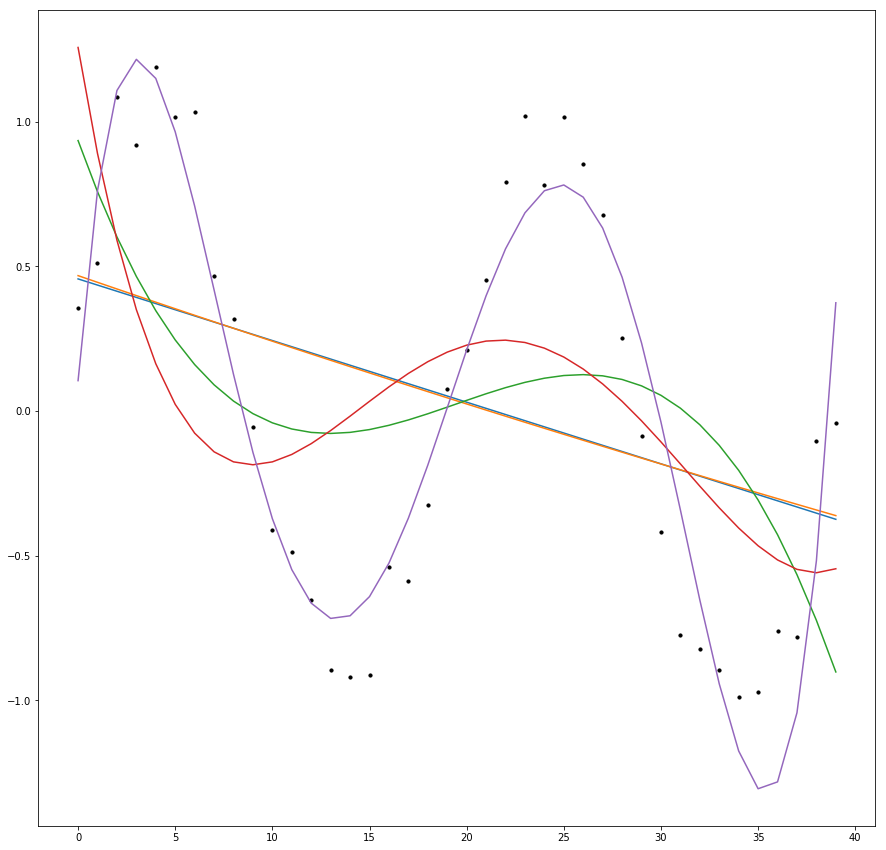

In [12]:
draw_ridge("../Datasets/noisysine.csv", 1, True)

In [13]:
draw_ridge("../Datasets/hydrodynamics.csv", 6)

hydrodynamics: degree = 1, alpha = 1e-10 R^2 = 0.6746513006015533
hydrodynamics: degree = 2, alpha = 0.0001 R^2 = 0.9168785845657623
